# Treinamento da ResNet50

Após treinarmos a ResNet34, resolvemos então treinar uma rede mais complexa, mas da mesma "família", a ResNet50.

Esperamos que o resultado da ResNet50 seja superior ao da ResNet34, justamente por possuir uma capacidade maior de aprendizagem.

In [1]:
from fastai.vision import *

In [2]:
path = Path('..')
path.ls()

[PosixPath('../.git'),
 PosixPath('../models'),
 PosixPath('../src'),
 PosixPath('../dataset'),
 PosixPath('../README.md'),
 PosixPath('../labeled_v1.csv'),
 PosixPath('../.ipynb_checkpoints'),
 PosixPath('../labeled_v2.csv')]

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, valid_pct=0.25, csv_labels='labeled_v2.csv',ds_tfms=get_transforms(),
                               size=224, num_workers=4).normalize(imagenet_stats)
data.classes

['match', 'unmatch']

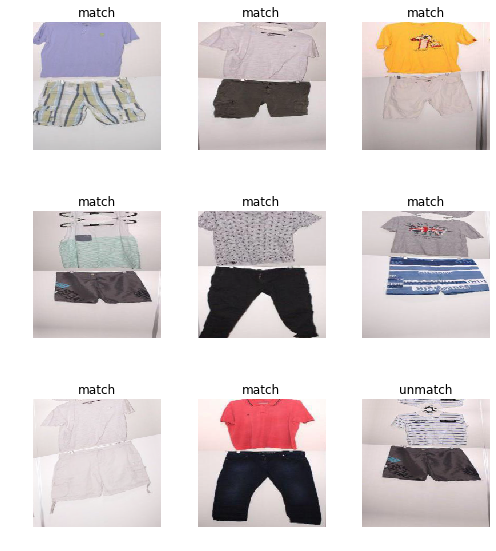

In [4]:
data.show_batch(rows=3, figsize=(7,8))

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['match', 'unmatch'], 2, 214, 71)

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.782201,0.903951,0.549296,00:07
1,0.698495,0.482416,0.225352,00:03
2,0.595135,0.469218,0.225352,00:03
3,0.514712,0.447834,0.126761,00:03
4,0.476918,0.436838,0.112676,00:03


## Análise da matriz

Como podemos observar, a matriz de confusão nos indica que os resultados até agora são melhores na ResNet50

Vamos observar o gráfico das perdas:

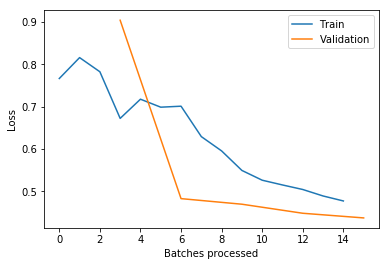

In [9]:
learn.recorder.plot_losses()

Algo estranho aconteceu aqui. O `valid_loss` está menor que o `train_loss`.

Isso é estranho, mas pode ocorrer por causa do `dropout`, que desliga algumas conexões no treinamento, mas ativa todas na hora da validação.

Seguiremos o treinamento para o `stage-2`, para vermos se a rede melhora.

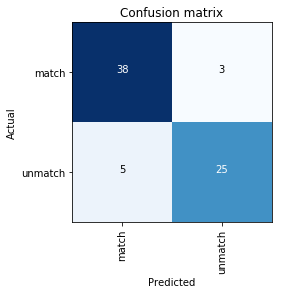

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
learn.save('resnet50-stage-1')

## Estágio 2
Vamos seguir em frente e ver como se comporta a rede no treinamento restante do treinamento

In [20]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.load('resnet50-stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


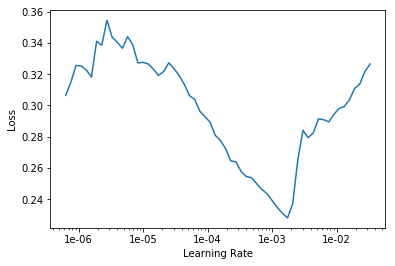

In [21]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(5, max_lr=slice(3e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.298403,0.384227,0.112676,00:03
1,0.327836,0.323712,0.154930,00:03
2,0.284611,0.203785,0.098592,00:03
3,0.287814,0.234758,0.084507,00:03
4,0.275293,0.238336,0.098592,00:03


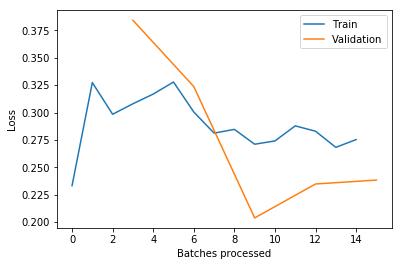

In [23]:
learn.recorder.plot_losses()

In [24]:
learn.save('resnet50-stage-2')

# Resultado surpreendente!
## ou não?

Ao observarmos o resultado da ResNet34 com a ResNet50 temos 90.9% vs 87.4% de acurácia, respectivamente. É diferente do que imaginávamos, mas não são resultados muitos distantes. Mas hey, qualquer acurácia a mais, está valendo, não é mesmo?

No próximo caderno (`testing`), observaremos como as redes se comportam com dados de teste.